In [224]:
#importing libraries
import pandas as pd
import numpy as np
import cv2
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [225]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation,Flatten,Conv2D,MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [226]:
directory='Desktop/Mask/Medical mask/Medical mask/Medical Mask/annotations'
image_directory='Desktop\Mask\Medical mask\Medical mask\Medical Mask\images'
train=pd.read_csv('Desktop/Mask/train.csv')
test=pd.read_csv('Desktop/Mask/submission.csv')

In [227]:
directory

'Desktop/Mask/Medical mask/Medical mask/Medical Mask/annotations'

In [228]:
train.head()

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


# The function getjson retreive all json files containning bounded boxes

In [230]:
def getjson(filename):
    with open(filename,'r') as f:
        return json.load(f)

In [231]:
jsonfiles=[]
for i in os.listdir(directory):
    jsonfiles.append(getjson(os.path.join(directory,i)))
    
jsonfiles[2]

{'FileName': '1803.jpg',
 'NumOfAnno': 2,
 'Annotations': [{'isProtected': False,
   'ID': 878367304953179776,
   'BoundingBox': [126, 75, 303, 333],
   'classname': 'face_with_mask',
   'Confidence': 1,
   'Attributes': {}},
  {'isProtected': False,
   'ID': 12410823666672788,
   'BoundingBox': [147, 200, 288, 320],
   'classname': 'mask_surgical',
   'Confidence': 1,
   'Attributes': {}}]}

In [232]:
data=[]
img_size=24
mask=["face_with_mask"]
nomask=["face_no_mask"]
labels={'mask':0,'nomask':1}
for i in train['name'].unique():
    f=i+".json"
    for j in getjson(os.path.join(directory,f)).get("Annotations"):
        if j["classname"] in mask:
            x,y,w,h=j["BoundingBox"]
            img = cv2.imread(os.path.join(image_directory,i),1)
            img = img[y:h,x:w]
            img = cv2.resize(img,(img_size,img_size))
            data.append([img,labels["mask"]])
        if j["classname"] in nomask:
            x,y,w,h = j["BoundingBox"]
            img = cv2.imread(os.path.join(image_directory,i),1)
            img = img[y:h,x:w]
            img = cv2.resize(img,(img_size,img_size))    
            data.append([img,labels["nomask"]])
random.shuffle(data)
    

In [233]:
imagegen= ImageDataGenerator(
            rotation_range=30,
            width_shift_range=0.1,
            height_shift_range=0.1,
            rescale=1/255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
)

In [234]:
imagegen.flow_from_directory('Desktop\Mask\Medical mask\Medical mask\Medical Mask\images')

Found 0 images belonging to 0 classes.


c:\users\grace\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

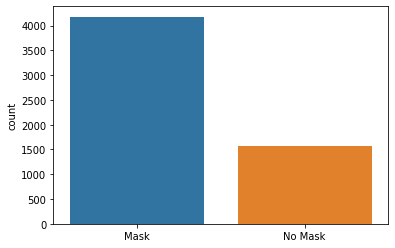

In [235]:
p = []
for face in data:
    if(face[1] == 0):
        p.append("Mask")
    else:
        p.append("No Mask")
sns.countplot(p)

In [236]:
X = []
Y = []
for features,label in data:
    X.append(features)
    Y.append(label)

X = np.array(X)/255.0
Y = np.array(Y)

# Model

In [237]:
model=Sequential()

In [238]:
shape=(24,24,3)

In [239]:
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [240]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [241]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 22, 22, 64)        1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 2, 2, 128)         147584    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 128)              

In [242]:
traingen=imagegen.flow_from_directory('Desktop/car-or-truck/train',target_size=(128,128),batch_size=32,class_mode='binary')

Found 5117 images belonging to 2 classes.


In [243]:
ytrain[0].shape

()

In [244]:
result=model.fit(xtrain,ytrain,epochs=5,steps_per_epoch=100)

Epoch 1/5
100/100 [==============================] - 2s 23ms/step - loss: 0.3718 - accuracy: 0.8243
Epoch 2/5
100/100 [==============================] - 2s 23ms/step - loss: 0.2456 - accuracy: 0.8969
Epoch 3/5
100/100 [==============================] - 2s 23ms/step - loss: 0.2008 - accuracy: 0.9239
Epoch 4/5
100/100 [==============================] - 2s 24ms/step - loss: 0.1791 - accuracy: 0.9339
Epoch 5/5
100/100 [==============================] - 3s 28ms/step - loss: 0.1634 - accuracy: 0.9409 0s


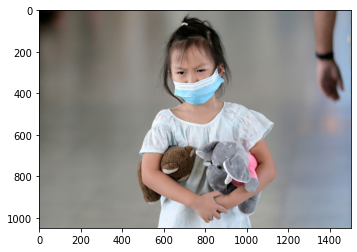

In [245]:
image=cv2.imread('Desktop/Mask/Medical mask/Medical mask/Medical Mask/images/0004.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Labels=Nomask:1, mask:0

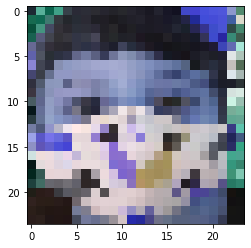

In [256]:
plt.imshow(xval[30],cmap=plt.cm.binary)

In [258]:
yval[19]

1

In [248]:
type(result)

tensorflow.python.keras.callbacks.History

In [249]:
print(result.history['accuracy'])

[0.8243096470832825, 0.8969340920448303, 0.9238964915275574, 0.9338986873626709, 0.9408566951751709]


In [250]:
print(result.history.keys())

dict_keys(['loss', 'accuracy'])


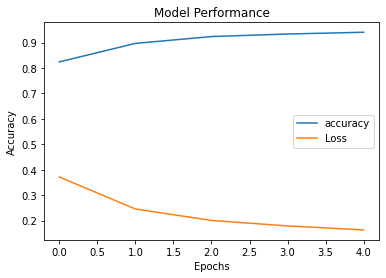

In [251]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['loss'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['accuracy','Loss'])

# Notebook by: Aimen Javed https://github.com/AimenJaved